In [1]:
import pandas as pd
import plotly.graph_objects as go
from Bio import AlignIO
import math
from operator import itemgetter
import pandas as pd
import random
import CommonMotifProb
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import base64
import datetime
import io
import plotly.express as px
import dash
from dash.dependencies import Input, Output, State
import dash_core_components as dcc
import dash_html_components as html
import dash_table
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator
from Bio import SeqIO
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline

This notebook uses simple numerical approaches to determine on average how many copies of a new variant you would expect after a certain number of duplication during exponential growth in e.g. a viral population. First I determine this in the absence of selection, and subsequently also look at the role of fitness in the number of a new variant.

# Accessibility without fitness

In [2]:
def accessibilitySequence(low,high,interval):
    if low==0:
        low=1
    totalseq=[]
    current=low
    totalseq.append(low)
    while current<high:
        current*=interval
        totalseq.append(current)
    return totalseq

In [3]:
a=accessibilitySequence(1,10**50,100)

c=[1.0/i for i in a if (1.0/i)<0.001]



In [3]:
access=[1.0/i for i in accessibilitySequence(1,10**20,10) if (1.0/i)<0.001]
gens=[round(i,4) for i in accessibilitySequence(1.0,10**18,2)]
genslabels=["2^"+str(i) for i in range(61)]
numericalAccess=pd.DataFrame(1, columns=genslabels, index=access)

In [4]:
numericalAccess

,2^0,2^1,2^2,2^3,2^4,2^5,2^6,2^7,2^8,2^9,...,2^51,2^52,2^53,2^54,2^55,2^56,2^57,2^58,2^59,2^60
1.000000e-04,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1.000000e-05,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1.000000e-06,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1.000000e-07,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1.000000e-08,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1.000000e-09,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1.000000e-10,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1.000000e-11,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1.000000e-12,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1.000000e-13,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [7]:
#populate dataframe with values (each mut prob version)
import random
for i in access:
    pop=0
    for j in range(61):
        print(j)
        pop+=int(i*(2**j))
        if pop==0:
            numericalAccess["2^"+str(j)][i]=1
        else:
            numericalAccess["2^"+str(j)][i]=pop
        
        
            
        pop*=2

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
4

In [8]:
#populate dataframe with values
import random
for i in access:
    pop=0
    for j in range(61):
        mutprob=1-((1-i)**(2**j))
        print (2**j,mutprob,int(i*(2**j)))
        randnum=random.random()
        if randnum<mutprob:
            pop+=(i*(2**j))
        
        numericalAccess["2^"+str(j)][i]=pop
            
        pop*=2

1 9.999999999998899e-05 0
2 0.00019998999999992773 0
4 0.00039994000399989904 0
8 0.0007997200559929363 0
16 0.00159880055981787 0
32 0.003195044956405657 0
64 0.006379881600537818 0
128 0.012719060311838892 0
256 0.025276346128461524 0
512 0.04991379858331724 0
1024 0.09733620987761848 0
2048 0.18519808200189725 0
4096 0.3360978344266131 0
8192 0.5592339145469671 0
16384 0.8057252579144097 1
32768 0.9622573245875774 3
65536 0.9985754904527125 6
131072 0.9999979707725497 13
262144 0.9999999999958822 26
524288 1.0 52
1048576 1.0 104
2097152 1.0 209
4194304 1.0 419
8388608 1.0 838
16777216 1.0 1677
33554432 1.0 3355
67108864 1.0 6710
134217728 1.0 13421
268435456 1.0 26843
536870912 1.0 53687
1073741824 1.0 107374
2147483648 1.0 214748
4294967296 1.0 429496
8589934592 1.0 858993
17179869184 1.0 1717986
34359738368 1.0 3435973
68719476736 1.0 6871947
137438953472 1.0 13743895
274877906944 1.0 27487790
549755813888 1.0 54975581
1099511627776 1.0 109951162
2199023255552 1.0 219902325
439804

16 1.5987211554602254e-13 0
32 3.197442310920451e-13 0
64 6.394884621840902e-13 0
128 1.2789769243681803e-12 0
256 2.5579538487363607e-12 0
512 5.115907697472721e-12 0
1024 1.0231815394945443e-11 0
2048 2.0463630789890885e-11 0
4096 4.092726157978177e-11 0
8192 8.185452315956354e-11 0
16384 1.6370904631912708e-10 0
32768 3.2741809263825417e-10 0
65536 6.548361852765083e-10 0
131072 1.3096723705530167e-09 0
262144 2.6193447411060333e-09 0
524288 5.238689482212067e-09 0
1048576 1.0477378964424133e-08 0
2097152 2.0954757706803662e-08 0
4194304 4.1909514969518114e-08 0
8388608 8.381902816267939e-08 0
16777216 1.6763804933095372e-07 0
33554432 3.352760706842872e-07 0
67108864 6.70552028902982e-07 0
134217728 1.3411036081656391e-06 0
268435456 2.6822054177699783e-06 0
536870912 5.364403641294757e-06 0
1073741824 1.072877850583076e-05 0
2147483648 2.1457441904959573e-05 0
4294967296 4.291442338810736e-05 0
8589934592 8.582700512838048e-05 0
17179869184 0.00017164664398194862 0
34359738368 0.0

In [9]:
#populate dataframe with values
dfdatalist=[]
columns=['Acessibility','Reps', 'PopProb']
expnums=[5,10,15,20]
for exp in expnums:
    for j in gens:
        for i in access:
            if i ==10**-5 or i==10**-10 or i==10**-15 or i==10**-20:
                pop=1
                mutprob=1-((1-i)**j)
                if mutprob>=0.5:
                    if j>10**exp and j<(2*10**exp):
                        dfdatalist.append([i,j,numericalAccess[j][i]])
                        #print numericalAccess[j][i]

                    pop*=2
                else:
                    if j>10**exp and j<(2*10**exp):
                        dfdatalist.append([i,j,mutprob])


                
barplotDF=pd.DataFrame(dfdatalist, columns=columns)

KeyError: 131072.0

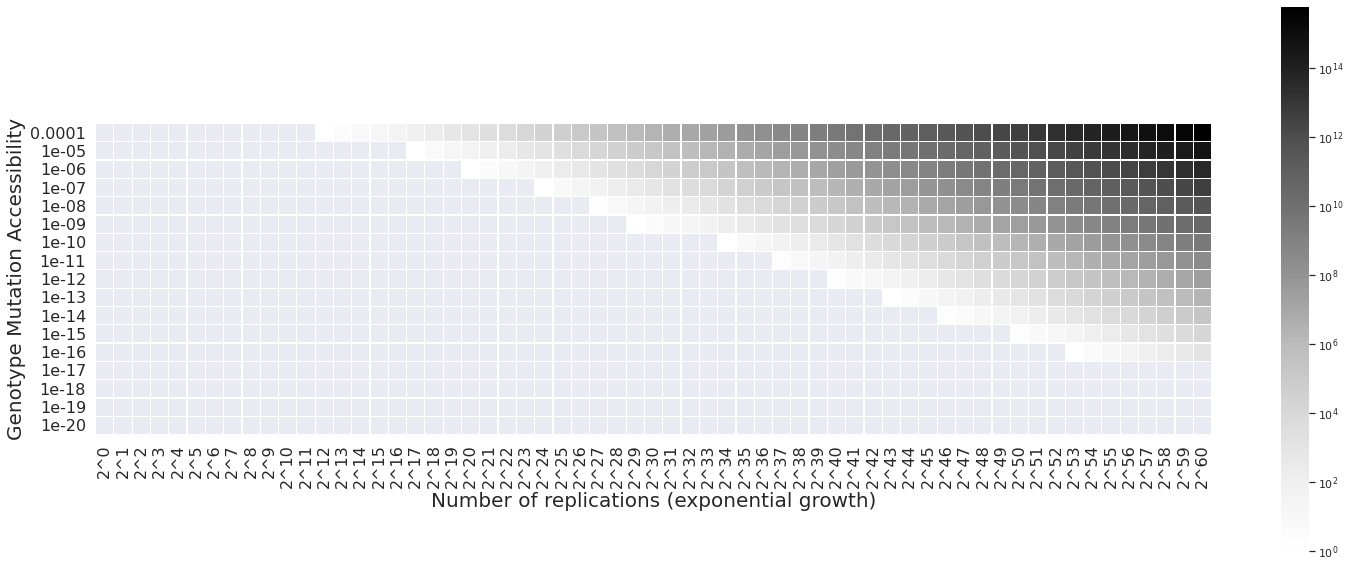

In [11]:

import seaborn as sns; sns.set()
sns.set(rc={'figure.figsize':(25,10)})

ax = sns.heatmap(numericalAccess, cmap="Greys",norm=LogNorm(), linewidths=.2,linecolor='white', square=True)
ax.set_yticklabels(ax.get_yticklabels(),rotation=0)
ax.set_xlabel("Number of replications (exponential growth)",fontsize=20)
ax.set_ylabel("Genotype Mutation Accessibility",fontsize=20)
ax.tick_params(labelsize=16)
plt.savefig('NumericalAccessibilityHeatPlotLogColour.pdf')

# Accessibiilty and fitness together

In [13]:
def relativefitness(percent):
    fitnesslist=[]
    i=1
    while i<6:
        fitnesslist.append(i)
        i*=percent
        
    return fitnesslist

In [14]:
relativefitness(1.1)

[1,
 1.1,
 1.2100000000000002,
 1.3310000000000004,
 1.4641000000000006,
 1.6105100000000008,
 1.771561000000001,
 1.9487171000000014,
 2.1435888100000016,
 2.357947691000002,
 2.5937424601000023,
 2.853116706110003,
 3.1384283767210035,
 3.4522712143931042,
 3.797498335832415,
 4.177248169415656,
 4.594972986357222,
 5.054470284992944,
 5.559917313492239]

In [15]:
access=[1.0/i for i in accessibilitySequence(1,10**16,10) if (1.0/i)<0.001]
fitness=[round(i,2) for i in np.arange(0.9,1.81,0.1)]
print(fitness)
numericalAccessFitness=pd.DataFrame(0.0, columns=fitness, index=access)

[0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8]


In [16]:
numericalAccessFitness

,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8
1.000000e-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000000e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000000e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000000e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000000e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000000e-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000000e-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000000e-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000000e-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000000e-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
dataDICT={}
for i in access:
    dataDICT[i]={}
    for j in fitness:
        print(j)
        dataDICT[i][j]=[]

0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8


In [18]:

#Determine size of subpop at given population size
for m in range(1000):
    for fitnessI in fitness:
        for i in access:
            pop=0
            for j in gens:
                if j<10**15:
                    Gained=False
                    mutprob=1-((1-i)**j)
                    event=random.random()
                    if event<mutprob:
                        Gained=True
                    #if mutprob>=0.1:
                    if Gained:
                        pop+=1
                    pop*=(2.0*fitnessI)
                else:
                    
                    if pop==1:
                        popsave=1
                    else:
                        popsave=pop
                    dataDICT[i][fitnessI].append(popsave)#math.log(popsave)
                    break

In [19]:
for j in gens:
    print(j)

1.0
2.0
4.0
8.0
16.0
32.0
64.0
128.0
256.0
512.0
1024.0
2048.0
4096.0
8192.0
16384.0
32768.0
65536.0
131072.0
262144.0
524288.0
1048576.0
2097152.0
4194304.0
8388608.0
16777216.0
33554432.0
67108864.0
134217728.0
268435456.0
536870912.0
1073741824.0
2147483648.0
4294967296.0
8589934592.0
17179869184.0
34359738368.0
68719476736.0
137438953472.0
274877906944.0
549755813888.0
1099511627776.0
2199023255552.0
4398046511104.0
8796093022208.0
17592186044416.0
35184372088832.0
70368744177664.0
140737488355328.0
281474976710656.0
562949953421312.0
1125899906842624.0
2251799813685248.0
4503599627370496.0
9007199254740992.0
1.8014398509481984e+16
3.602879701896397e+16
7.205759403792794e+16
1.4411518807585587e+17
2.8823037615171174e+17
5.764607523034235e+17
1.152921504606847e+18


In [20]:
timelistPD

NameError: name 'timelistPD' is not defined

In [23]:
filterPD=timelistPD[['1.3-0.0001','1.1-0.0001','1.3-1e-08','1.1-1e-08','1.3-1e-12','1.5-1e-12','1.7-1e-16']]

NameError: name 'timelistPD' is not defined

In [22]:
timelistPD=timelistPD.reset_index()
newPD=timelistPD[timelistPD['index']==50]

NameError: name 'timelistPD' is not defined

In [162]:
for i in newPD:
    if newPD[i].values[0]>10**12 and newPD[i].values[0]<10**14:
        print(i, newPD[i].values[0])

1.1-0.0001 35733612745117.32
1.1-1e-05 1770252692269.8435
1.2-1e-05 34791781398906.223
1.2-1e-06 2516766594247.992
1.3-1e-06 28089791029326.59
1.3-1e-07 1342095629679.3386
1.4-1e-07 11122164422445.67
1.5-1e-07 80068773592362.0
1.5-1e-08 2683080596568.0
1.6-1e-08 6186952125833.8
1.7-1e-08 70217162034175.44
1.8-1e-09 2398745481553.5903


In [163]:
columns=['fitness','access']
data=[[1.05,0.0001],[1.1,1e-05],[1.2,1e-06],[1.3,1e-07],[1.5,1e-08],[1.8,1e-09]]
testplotPD=pd.DataFrame(data,columns=columns)


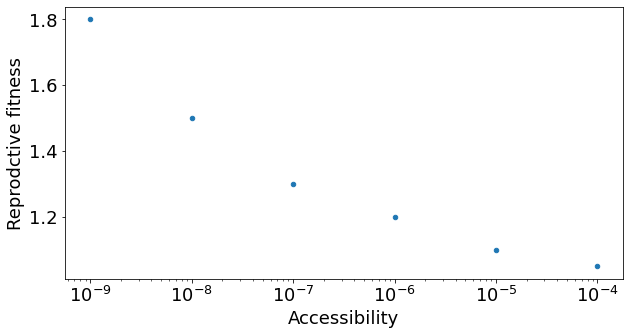

In [183]:
plt.rcParams.update({'font.size': 18})
testplotPD.plot.scatter(x='access',y='fitness',logx=True,figsize=(10,5),xlabel='Accessibility',ylabel='Reprodctive fitness')
plt.savefig('Eqivalence-curve-fitness-access.pdf')

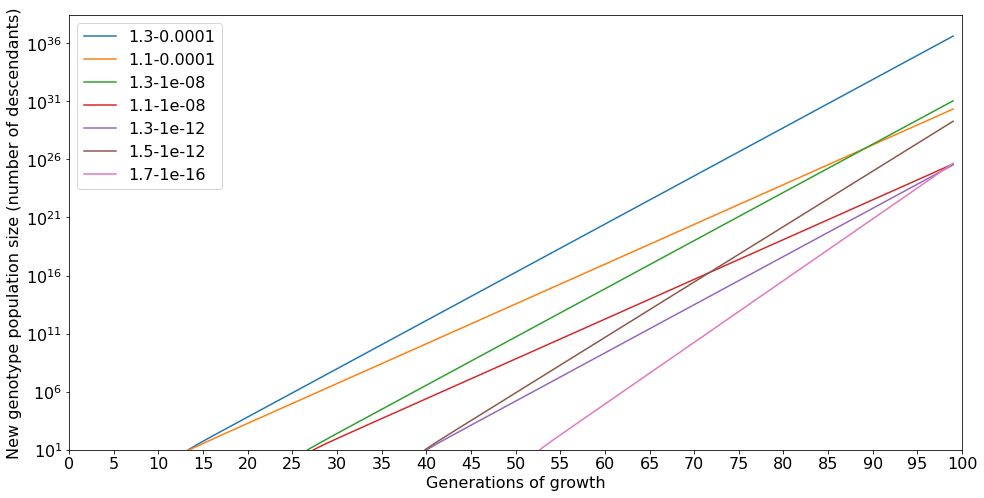

In [184]:
plt.rcParams.update({'font.size': 16})

filterPD.reset_index().plot(x='index',y=['1.3-0.0001','1.1-0.0001','1.3-1e-08','1.1-1e-08','1.3-1e-12','1.5-1e-12','1.7-1e-16'],xlabel='Generations of growth',figsize=(16,8),ylabel='New genotype population size (number of descendants)',logy=True,ylim=10**1,xlim=(0,100),xticks=[i for i in range(0,101,5)])

plt.savefig('Timecourse-fitness-access.pdf')

In [109]:

#Determine timeline of population growth for a few combinations of accessibility and fitness

#want to do one high access low fitness, high fitness low access, high fitness high access, low fitness low access and two different sets of low access high fitness and high access low fitness
#
strlistfitnessaccess=[]
for fitnessI in fitness:
    for i in access:
        strlistfitnessaccess.append(str(fitnessI)+'-'+str(i))
timeaxs=[i for i in range(100)]

timelistPD=pd.DataFrame(0.0, columns=strlistfitnessaccess, index=timeaxs)
for fitnessI in fitness:
    for i in access:
        pop=0
        WTpop=1
        for m in range(100):
            Gained=False
            mutprob=1-((1-i)**WTpop)
            event=random.random()
            if event<mutprob:
                Gained=True
            #if mutprob>=0.1:
            if Gained:
                pop+=1
            pop*=(2.0*fitnessI)
            timelistPD[str(fitnessI)+'-'+str(i)][m]=pop
            WTpop*=2


In [151]:

#Determine timeline of population growth for a few combinations of accessibility and fitness

#want to do one high access low fitness, high fitness low access, high fitness high access, low fitness low access and two different sets of low access high fitness and high access low fitness
#
import statistics
strlistfitnessaccess=[]
for fitnessI in fitness:
    for i in access:
        strlistfitnessaccess.append(str(fitnessI)+'-'+str(i))
timeaxs=[i for i in range(100)]
dataDICT={}
for i in strlistfitnessaccess:
    dataDICT[i]={}
    for k in range(100):
        dataDICT[i][k]=[]
timelistPD=pd.DataFrame(0.0, columns=strlistfitnessaccess, index=timeaxs)
for k in range(100):
    for fitnessI in fitness:
        for i in access:
            pop=0
            WTpop=1
            for m in range(100):
                Gained=False
                mutprob=1-((1-i)**WTpop)
                event=random.random()
                if event<mutprob:
                    Gained=True
                #if mutprob>=0.1:
                if Gained:
                    pop+=1
                pop*=(2.0*fitnessI)
                dataDICT[str(fitnessI)+'-'+str(i)][m].append(pop)
                WTpop*=2
for fitnessI in fitness:
    for i in access:
        for m in range(100):
            timelistPD[str(fitnessI)+'-'+str(i)][m]=statistics.median(dataDICT[str(fitnessI)+'-'+str(i)][m])

In [152]:
timelistPD

,0.9-0.0001,0.9-1e-05,0.9-1e-06,0.9-1e-07,0.9-1e-08,0.9-1e-09,0.9-1e-10,0.9-1e-11,0.9-1e-12,0.9-1e-13,...,1.8-1e-07,1.8-1e-08,1.8-1e-09,1.8-1e-10,1.8-1e-11,1.8-1e-12,1.8-1e-13,1.8-1e-14,1.8-1e-15,1.8-1e-16
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.698051e+21,7.648052e+20,1.018979e+20,1.315809e+19,2.256188e+18,2.853911e+17,3.767300e+16,4.661577e+15,7.993101e+14,1.370559e+14,...,1.623562e+41,1.209217e+39,2.591771e+37,5.245498e+35,3.307343e+33,7.088783e+31,1.214560e+30,1.663171e+28,1.938861e+26,4.155652e+24
96,8.456492e+21,1.376649e+21,1.834163e+20,2.368455e+19,4.061138e+18,5.137039e+17,6.781140e+16,8.390838e+15,1.438758e+15,2.467007e+14,...,5.844824e+41,4.353181e+39,9.330377e+37,1.888379e+36,1.190643e+34,2.551962e+32,4.372416e+30,5.987414e+28,6.979900e+26,1.496035e+25
97,1.522169e+22,2.477969e+21,3.301493e+20,4.263220e+19,7.310048e+18,9.246670e+17,1.220605e+17,1.510351e+16,2.589765e+15,4.440612e+14,...,2.104137e+42,1.567145e+40,3.358936e+38,6.798166e+36,4.286316e+34,9.187063e+32,1.574070e+31,2.155469e+29,2.512764e+27,5.385725e+25
98,2.739904e+22,4.460344e+21,5.942688e+20,7.673796e+19,1.315809e+19,1.664401e+18,2.197089e+17,2.718631e+16,4.661577e+15,7.993101e+14,...,7.574892e+42,5.641722e+40,1.209217e+39,2.447340e+37,1.543074e+35,3.307343e+33,5.666651e+31,7.759688e+29,9.045950e+27,1.938861e+26


In [167]:
#Determine how long they all take to reach a certain population
for m in range(10000):
    for fitnessI in fitness:
        for i in access:
            pop=0
            for j in gens:
                if pop<10**6:
                    Gained=False
                    mutprob=1-((1-i)**j)
                    event=random.random()
                    if event<mutprob:
                        Gained=True
                    #if mutprob>=0.1:
                    if Gained:
                        pop+=1
                    pop*=(2.0*fitnessI)
                else:
                    
                    if pop==1:
                        popsave=1
                    else:
                        popsave=pop
                    dataDICT[i][fitnessI].append(j)#math.log(popsave)
                    break

In [168]:
dataDICT

{0.0001: {0.8: [1099511627776.0,
   549755813888.0,
   549755813888.0,
   549755813888.0,
   2199023255552.0,
   549755813888.0,
   549755813888.0,
   8796093022208.0,
   17592186044416.0,
   2199023255552.0,
   1099511627776.0,
   274877906944.0,
   4398046511104.0,
   4398046511104.0,
   2199023255552.0,
   549755813888.0,
   2199023255552.0,
   549755813888.0,
   4398046511104.0,
   549755813888.0,
   1099511627776.0,
   1099511627776.0,
   2199023255552.0,
   549755813888.0,
   549755813888.0,
   2199023255552.0,
   549755813888.0,
   1099511627776.0,
   4398046511104.0,
   2199023255552.0,
   4398046511104.0,
   4398046511104.0,
   274877906944.0,
   1099511627776.0,
   1099511627776.0,
   4398046511104.0,
   549755813888.0,
   2199023255552.0,
   549755813888.0,
   1099511627776.0,
   549755813888.0,
   2199023255552.0,
   34359738368.0,
   549755813888.0,
   2199023255552.0,
   4398046511104.0,
   1099511627776.0,
   34359738368.0,
   1099511627776.0,
   2199023255552.0,
   4398

In [226]:
for fitnessI in fitness:
    print(fitnessI)
    for i in access:
        number=np.median(dataDICT[i][fitnessI])
        print(number)
        if number==0:
            numericalAccessFitness[fitnessI][i]=number
        else:
            numericalAccessFitness[fitnessI][i]=round(number,2)

0.9
8499287655.8184185
1075097100.8248339
184344494.16200852
23804410.782254007
3011080.151367888
516301.31676404114
66668.0525720303
9809.993777256828
1443.78922678272
198.08199936000005
29.76768000000001
1.8
0.0
1.0
412316860414.0
34359738366.0
4294967294.0
402653182.0
41943038.0
4194302.0
393214.0
32766.0
4094.0
382.0
38.0
2.0
0.0
1.1
14176183559709.762
1041161528114.512
75569150511.77896
5337434022.744842
302960334.6811847
28452321.280351676
2009580.071890272
114064.89001284349
10710.66885920769
754.7885593600004
41.113600000000005
2.2
0.0
1.2
364061200558171.1
14496575582876.594
1048652747602.3302
57419840236.298164
3597911034.408026
165393819.8197275
9056272.472317824
567461.8785607143
26084.24816861183
1694.1881241599995
87.78623999999999
2.4
0.0
1.3
7286913158890403.0
208904211930942.12
11885765357926.443
516190626798.7456
14798364373.87299
841964289.1975983
36565929.296171136
1736900.8151992788
59641.4729135514
2588.633781760001
128.17376000000004
2.6
0.0
1.4
1.176553264494194

In [201]:
numericalAccessFitness

,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8
1.000000e-04,2.093728e+10,1.637860e+12,9.989752e+13,2.449650e+15,1.231350e+17,1.178209e+19,1.472192e+20,4.615396e+21,7.418728e+22,7.354662e+24
1.000000e-05,2.817984e+09,4.233678e+11,6.058481e+12,4.673255e+14,8.951238e+16,4.962594e+16,2.019218e+18,2.234573e+19,4.280627e+20,2.895742e+21
1.000000e-06,3.398387e+08,2.829229e+10,1.156663e+12,1.344839e+14,6.743192e+14,1.117339e+15,6.179063e+16,5.494047e+18,2.543712e+20,4.908550e+19
1.000000e-07,5.132586e+07,1.031829e+10,9.259212e+10,1.032376e+12,1.179549e+14,3.304950e+14,3.789286e+14,1.605585e+16,2.144818e+17,1.857262e+19
1.000000e-08,7.987653e+06,2.819034e+08,2.610988e+09,2.066431e+10,6.206885e+12,5.324718e+12,4.225159e+15,8.892909e+14,1.085657e+15,1.766170e+18
1.000000e-09,1.138456e+06,1.235170e+07,1.636753e+08,1.491554e+09,2.225044e+10,1.441961e+13,1.257040e+12,4.970141e+12,6.563395e+13,8.517921e+13
1.000000e-10,1.976886e+05,1.662827e+06,1.496880e+07,1.881163e+08,4.498365e+08,6.061906e+10,1.870276e+12,5.131983e+10,3.147307e+12,1.273592e+12
1.000000e-11,1.637264e+04,1.610732e+05,1.569476e+06,2.581901e+08,5.434984e+07,2.896251e+09,9.920279e+09,2.017180e+09,1.417848e+10,5.165390e+10
1.000000e-12,2.564990e+03,1.361157e+04,7.157240e+04,1.503206e+05,1.453339e+06,5.460992e+06,4.125215e+07,6.103133e+08,1.940605e+10,6.824030e+09
1.000000e-13,4.523700e+02,1.386980e+03,7.987700e+03,5.724759e+05,4.783007e+04,2.306910e+05,6.600014e+05,7.261850e+05,5.555116e+06,4.750179e+06


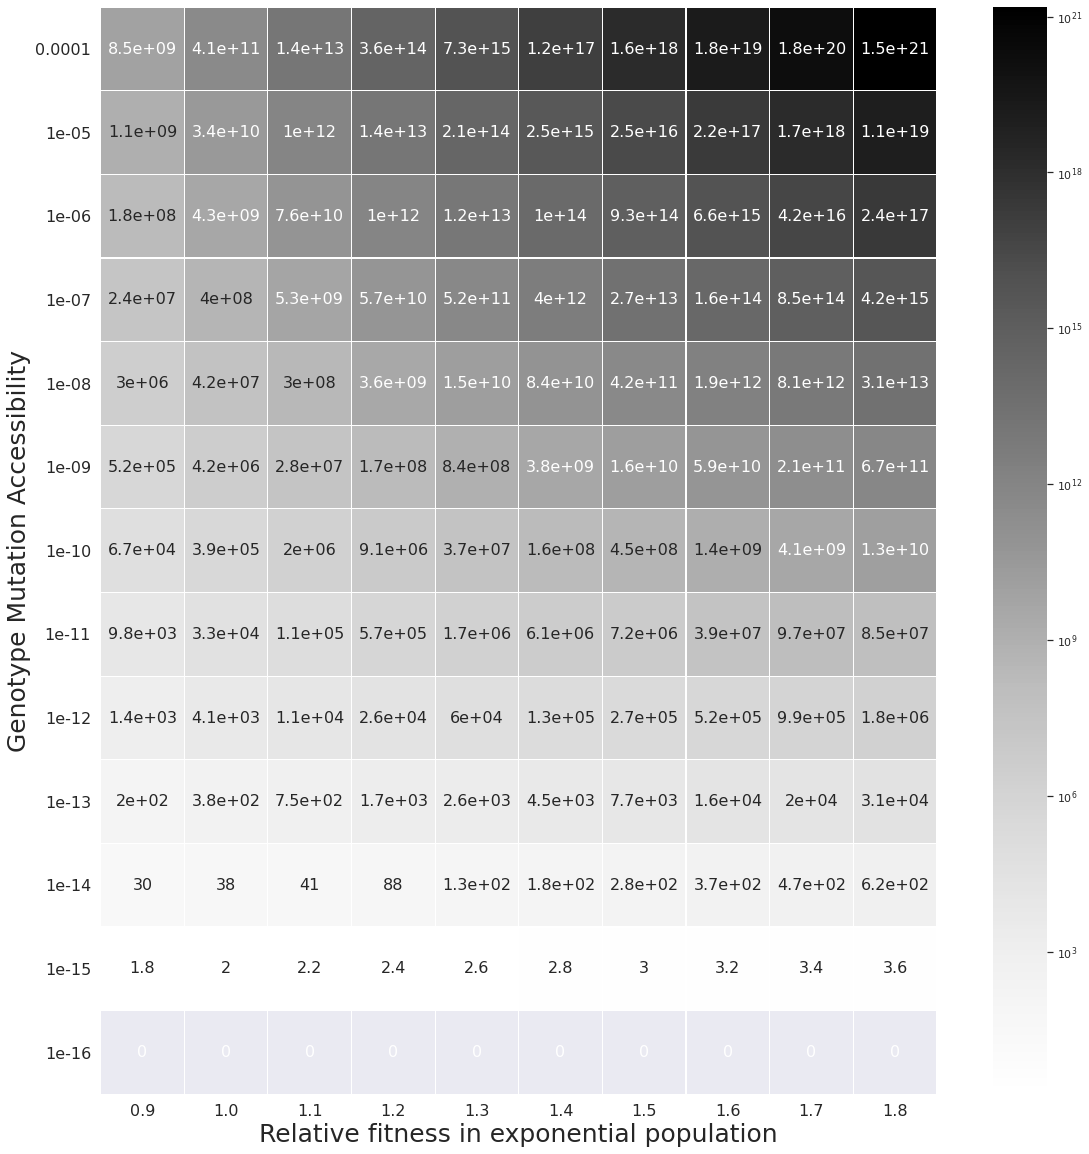

In [228]:
import seaborn as sns; sns.set()

sns.set(rc={'figure.figsize':(20,20),'font.size':16})

ax = sns.heatmap(numericalAccessFitness, cmap="Greys",norm=LogNorm(), linewidths=.2,linecolor='white', square=True, annot=True)
ax.set_yticklabels(ax.get_yticklabels(),rotation=0)
ax.set_xlabel("Relative fitness in exponential population",fontsize=25)
ax.set_ylabel("Genotype Mutation Accessibility",fontsize=25)
ax.tick_params(labelsize=16)
plt.savefig('NumericalAccessibilityandFitnessHeatPlot-full.pdf')

In [173]:
dataDICT={}
for i in access:
    dataDICT[i]={}
    for j in fitness:
        dataDICT[i][j]=[]

In [174]:
#Determine size of subpop at given population size

for fitnessI in fitness:
    for i in access:
        pop=0
        for j in gens:
            if j<10**30:
                Gained=False
                mutprob=1-((1-i)**j)
                event=random.random()
                if event<mutprob:
                    Gained=True
                #if mutprob>=0.1:
                if Gained:
                    pop+=1
                pop*=(2.0*fitnessI)
                dataDICT[i][fitnessI].append(pop)


In [182]:
dataDICT[1e-04][1.0]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 6.0,
 14.0,
 30.0,
 62.0,
 126.0,
 254.0,
 510.0,
 1022.0,
 2046.0,
 4094.0,
 8190.0,
 16382.0,
 32766.0,
 65534.0,
 131070.0,
 262142.0,
 524286.0,
 1048574.0,
 2097150.0,
 4194302.0,
 8388606.0,
 16777214.0,
 33554430.0,
 67108862.0,
 134217726.0,
 268435454.0,
 536870910.0,
 1073741822.0,
 2147483646.0,
 4294967294.0,
 8589934590.0,
 17179869182.0,
 34359738366.0,
 68719476734.0,
 137438953470.0,
 274877906942.0,
 549755813886.0,
 1099511627774.0,
 2199023255550.0,
 4398046511102.0,
 8796093022206.0,
 17592186044414.0,
 35184372088830.0,
 70368744177662.0,
 140737488355326.0,
 281474976710654.0,
 562949953421310.0]

In [188]:
for i in range(len(dataDICT[1e-08][1.4])):
    print(i)
    print(dataDICT[1e-04][1.0][i],'\t',dataDICT[1e-08][1.4][i])
    if dataDICT[1e-04][1.0][i]!=0:\
        print(dataDICT[1e-08][1.4][i]/dataDICT[1e-04][1.0][i])

0
0.0 	 0.0
1
0.0 	 0.0
2
0.0 	 0.0
3
0.0 	 0.0
4
0.0 	 0.0
5
0.0 	 0.0
6
0.0 	 0.0
7
0.0 	 0.0
8
0.0 	 0.0
9
0.0 	 0.0
10
0.0 	 0.0
11
0.0 	 0.0
12
0.0 	 0.0
13
2.0 	 0.0
0.0
14
6.0 	 0.0
0.0
15
14.0 	 0.0
0.0
16
30.0 	 0.0
0.0
17
62.0 	 0.0
0.0
18
126.0 	 0.0
0.0
19
254.0 	 0.0
0.0
20
510.0 	 0.0
0.0
21
1022.0 	 0.0
0.0
22
2046.0 	 0.0
0.0
23
4094.0 	 0.0
0.0
24
8190.0 	 0.0
0.0
25
16382.0 	 0.0
0.0
26
32766.0 	 0.0
0.0
27
65534.0 	 2.8
4.272591326639607e-05
28
131070.0 	 10.639999999999999
8.117799649042495e-05
29
262142.0 	 32.59199999999999
0.00012432956184052916
30
524286.0 	 94.05759999999997
0.00017940131912734647
31
1048574.0 	 266.16127999999986
0.00025383166090328375
32
2097150.0 	 748.0515839999996
0.0003566991316787066
33
4194302.0 	 2097.3444351999988
0.000500046118567523
34
8388606.0 	 5875.364418559996
0.0007003981851764162
35
16777214.0 	 16453.820371967988
0.0009807242353806768
36
33554430.0 	 46073.49704151036
0.0013730972942025944
37
67108862.0 	 129008.591716229
0.

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]


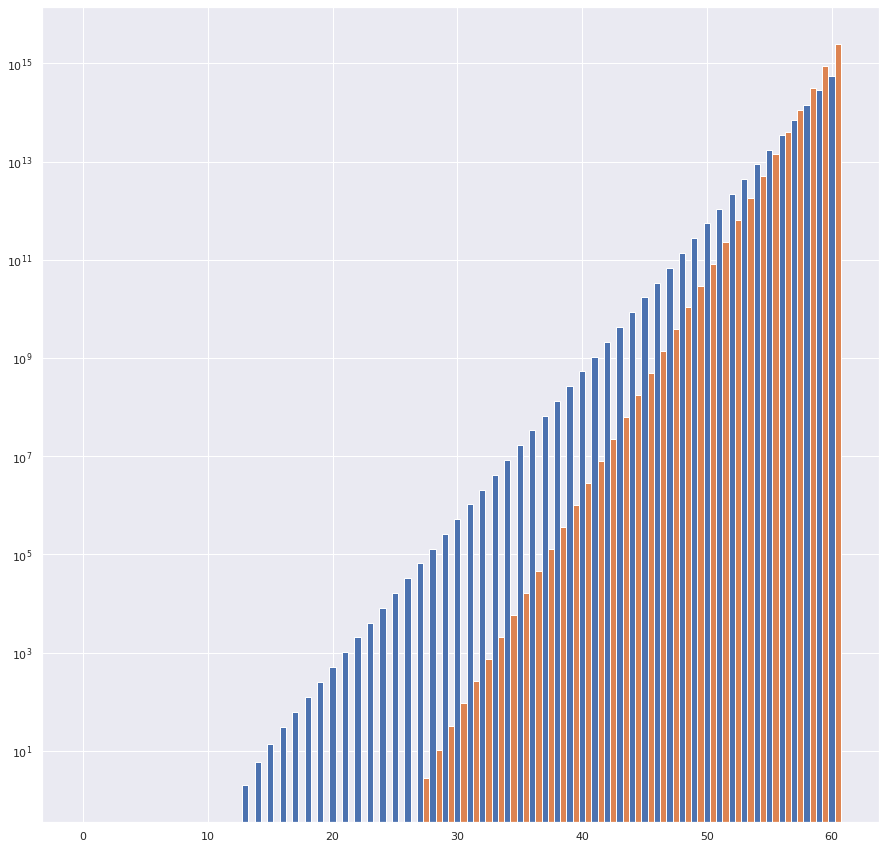

In [206]:

men_means = dataDICT[1e-04][1.0]
women_means = dataDICT[1e-08][1.4]

x = [i for i in range(61)]
x2= [i+width for i in range(61)]# the label locations
print(x)
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, men_means, width, label='1e-04, 1.0',log=True)
rects2 = ax.bar(x2, women_means, width, label='1e-08, 1.4',log=True)

<BarContainer object of 61 artists>

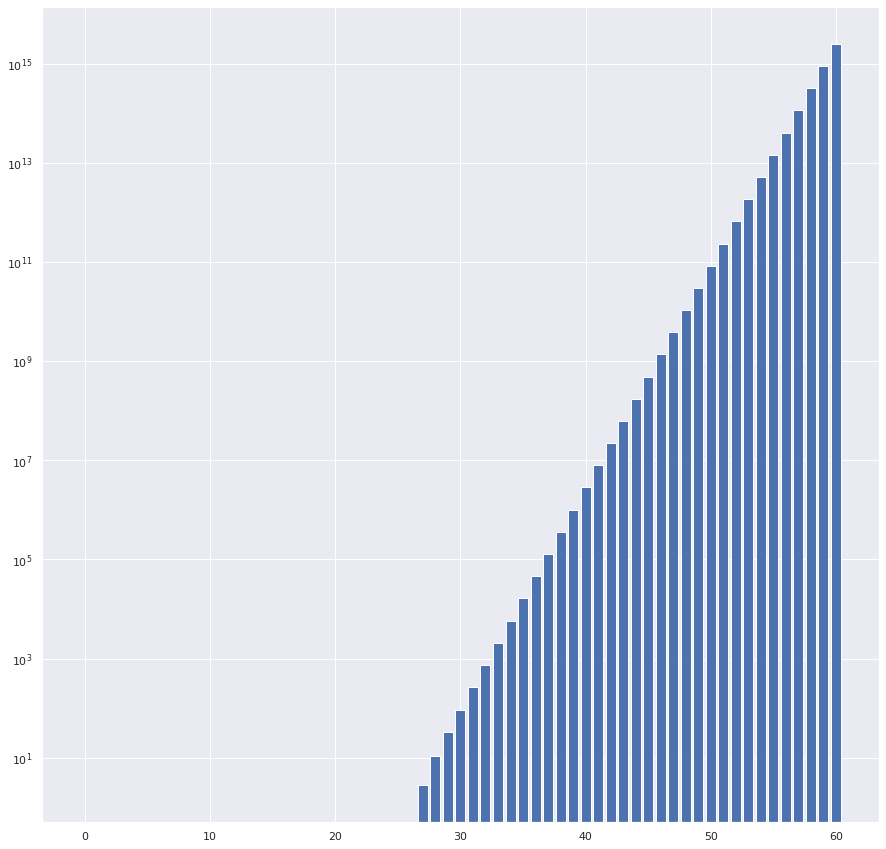

In [192]:
matplotlib.pyplot.bar(range(61),dataDICT[1e-08][1.4],log=True)

In [176]:
#fitness=1.0 acess=1e-04, seq 2 fitness =1.4, access=1e-08
columns=['Variant pop','Gen']
for fitnessI in fitness:
    for i in access:
        dataDICT[i][fitnessI]

0.8 0.0001
0.8 1e-05
0.8 1e-06
0.8 1e-07
0.8 1e-08
0.8 1e-09
0.8 1e-10
0.8 1e-11
0.8 1e-12
0.8 1e-13
0.8 1e-14
0.8 1e-15
0.8 1e-16
0.9 0.0001
0.9 1e-05
0.9 1e-06
0.9 1e-07
0.9 1e-08
0.9 1e-09
0.9 1e-10
0.9 1e-11
0.9 1e-12
0.9 1e-13
0.9 1e-14
0.9 1e-15
0.9 1e-16
1.0 0.0001
1.0 1e-05
1.0 1e-06
1.0 1e-07
1.0 1e-08
1.0 1e-09
1.0 1e-10
1.0 1e-11
1.0 1e-12
1.0 1e-13
1.0 1e-14
1.0 1e-15
1.0 1e-16
1.1 0.0001
1.1 1e-05
1.1 1e-06
1.1 1e-07
1.1 1e-08
1.1 1e-09
1.1 1e-10
1.1 1e-11
1.1 1e-12
1.1 1e-13
1.1 1e-14
1.1 1e-15
1.1 1e-16
1.2 0.0001
1.2 1e-05
1.2 1e-06
1.2 1e-07
1.2 1e-08
1.2 1e-09
1.2 1e-10
1.2 1e-11
1.2 1e-12
1.2 1e-13
1.2 1e-14
1.2 1e-15
1.2 1e-16
1.3 0.0001
1.3 1e-05
1.3 1e-06
1.3 1e-07
1.3 1e-08
1.3 1e-09
1.3 1e-10
1.3 1e-11
1.3 1e-12
1.3 1e-13
1.3 1e-14
1.3 1e-15
1.3 1e-16
1.4 0.0001
1.4 1e-05
1.4 1e-06
1.4 1e-07
1.4 1e-08
1.4 1e-09
1.4 1e-10
1.4 1e-11
1.4 1e-12
1.4 1e-13
1.4 1e-14
1.4 1e-15
1.4 1e-16


/home/agunnar/.virtualenvs/Py3Motifs/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


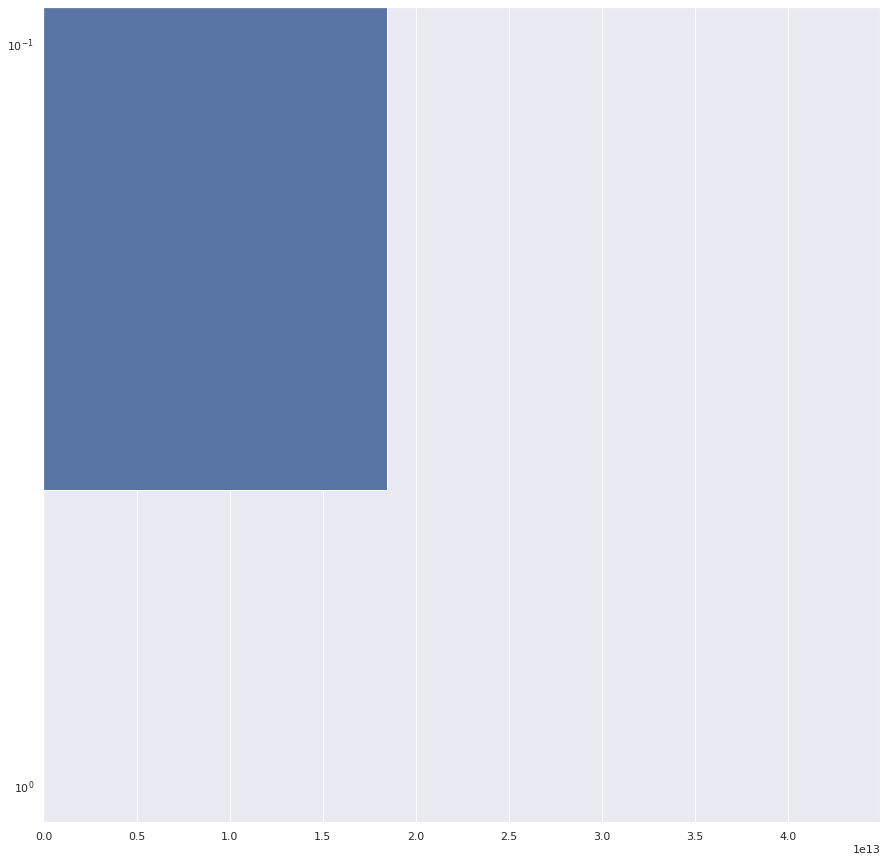

In [179]:
import seaborn as sns
ax = sns.barplot(x="Reps", y="PopProb",hue="Acessibility", data=barplotDF)
ax.set_yscale("log")

In [ ]:
barplotDF:
    